## IDS project

# Sentiment Analysis of Movie Reviews

Team Members:

Ameya Kale (SU ID: 3049670941)

ratik Kakade (SU ID: 484441082)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Imported nltk library and downloaded the stopwords required for data pre-processing

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Imported tokenizer, stemmer(Porter) and stopwords required to the process the text data(reviews)

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [4]:
stop_words = set(stopwords.words('english'))

# Dataset Analysis

The CSV format dataset is imported here 

In [5]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


We can see that there are 50K rows and 2 columns in the dataFrame

In [6]:
df.shape

(50000, 2)

Looking at the index 0 review and its sentiment 

In [7]:
print(df['review'].iloc[0], "\n")
print(df['sentiment'].iloc[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

We find the number of words in a review before preprocessing the reviews

In [8]:
def wordCount(text):
    words = text.split()
    numberOfWords = len(words)
    return numberOfWords

df['Words in each review'] = df['review'].apply(wordCount)
df.head()

,review,sentiment,Words in each review
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Here, we convert the sentiment classifiers from String to Number. "positive" is replaced by 1 and "negative" is replaced by 2

In [9]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [10]:
df.head()

,review,sentiment,Words in each review
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


We iterate over each review and perform some processing over it 
<br> 1. Convert text to lowercase
<br> 2. Used regular expressions to remove unnecessary words from the reviews including the stopwords

In [11]:
def removeUnnecessary(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

df.review = df['review'].apply(removeUnnecessary)

Now we find whether the data consists of duplicate reviews 

In [12]:
duplicates = df.duplicated().sum()
print("Duplicates: ", duplicates)

df = df.drop_duplicates('review')

Duplicates:  421


In [13]:
df.head()

,review,sentiment,Words in each review
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,2,138
4,petter matteis love time money visually stunni...,1,230


In [14]:
df.shape

(49578, 3)

We utilize stemming and process all the reviews to reduce the dimensions of our data by reducing the words from current form to root form. Then we again apply our wordCount() function for the changes in the previous word count

In [15]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [16]:
df.review = df['review'].apply(lambda x: stemming(x))

In [17]:
df.head()

,review,sentiment,Words in each review
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,2,138
4,petter matteis love time money visually stunni...,1,230


In [18]:
df['word count'] = df['review'].apply(wordCount)
df.head()

,review,sentiment,Words in each review,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,168
1,wonderful little production filming technique ...,1,162,84
2,thought wonderful way spend time hot summer we...,1,166,86
3,basically theres family little boy jake thinks...,2,138,67
4,petter matteis love time money visually stunni...,1,230,125


In [19]:
X = df['review']
Y = df['sentiment']

In [20]:
vect = TfidfVectorizer()
vect.fit(df['review'])
print("Some sample features(unique words in the corpus)",vect.get_feature_names()[0:10])
X = vect.transform(df['review'])

Some sample features(unique words in the corpus) ['00', '000', '0000000000001', '00000001', '000001', '0001', '00015', '001', '0010', '002']


In [21]:
print("Type for count vectorizer: ",type(X))
print("Shape for TFIDF vectorizer: ",X.get_shape())
print("Number of unique words: ", X.get_shape()[1])

Type for count vectorizer:  <class 'scipy.sparse.csr.csr_matrix'>
Shape for TFIDF vectorizer:  (49578, 221707)
Number of unique words:  221707


Divided the dataset in train (80%) and test(20%) dataset

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ensemble Learning

Here we implement Bagging ensemble technique by utilizing baggingClassifier with 5 base models 

In [23]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_estimators=5, random_state=0)
bc.fit(x_train, y_train)
bc_pred = bc.predict(x_test)
bc_acc = accuracy_score(bc_pred, y_test)
print("Test accuracy: {:.2f}%".format(bc_acc*100))

Defining the Deep Learning Model

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [26]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [27]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [28]:
dl = Sequential()
dl.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
dl.add(Dense(units=8, activation='relu'))
dl.add(Dense(units=1, activation='sigmoid'))

Compiling the model

In [29]:
dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the model

In [30]:
history = dl.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 9s 40ms/step - loss: -0.0435 - accuracy: 0.4985
Epoch 2/15
200/200 [==============================] - 7s 33ms/step - loss: -3.5263 - accuracy: 0.5005
Epoch 3/15
200/200 [==============================] - 6s 31ms/step - loss: -14.1157 - accuracy: 0.5005
Epoch 4/15
200/200 [==============================] - 6s 28ms/step - loss: -37.3335 - accuracy: 0.5005
Epoch 5/15
200/200 [==============================] - 7s 33ms/step - loss: -76.5270 - accuracy: 0.5005
Epoch 6/15
200/200 [==============================] - 6s 31ms/step - loss: -134.4536 - accuracy: 0.5005
Epoch 7/15
200/200 [==============================] - 6s 30ms/step - loss: -213.5797 - accuracy: 0.5005
Epoch 8/15
200/200 [==============================] - 6s 31ms/step - loss: -315.4333 - accuracy: 0.5005
Epoch 9/15
200/200 [==============================] - 6s 28ms/step - loss: -441.5270 - accuracy: 0.5005
Epoch 10/15
200/200 [==============================] - 7s 35ms/step - l

Getting the accuracy of the model we just trained

In [31]:
dl_test_loss, dl_test_acc = dl.evaluate(x_test, y_test)
print('Test Accuracy: ', dl_test_acc)
print("Test accuracy: {:.2f}%".format(dl_test_acc*100))

16/16 [==============================] - 0s 17ms/step - loss: -1914.2028 - accuracy: 0.4840
Test Accuracy:  0.48399999737739563
Test accuracy: 48.40%


Storing the predicted values for ourr Deep Learning model in a variable y_pred. However, y_pred is not binary. Therefore, we need to convert it into values of 1s and 2s for our classification tasks.

In [61]:
#%%timeit

y_pred = dl.predict(x_test)
#print(y_pred)

16/16 [==============================] - 0s 18ms/step


In [62]:
dl_pred = [round(x[0]) for x in y_pred]
dl_acc = accuracy_score(y_test, dl_pred)
print(dl_acc)

0.484


We store the converted values of y_pred in dl_pred.

In [63]:
print(dl_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [65]:
len(dl_pred)

500

Model for Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [53]:
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 82.00%


Model for Multinomial Naive Bayes

In [42]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [54]:
#%%timeit

mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 82.80%


Model for Linear SVC

In [44]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)

LinearSVC(C=1, loss='hinge')

In [55]:
#%%timeit

svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 85.40%


Model for K-Nearest Neighbors. To select the optimal value for k, we will train multiple knn models and plot the respective elbow graph for the values of k and the error rates.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

test_error_rates = []

for k in range(1,30):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(x_train,y_train) 
    kNN_pred = kNN.predict(x_test)
    error = 1 - accuracy_score(y_test, kNN_pred)
    test_error_rates.append(error)

Text(0.5, 0, 'Values for K')

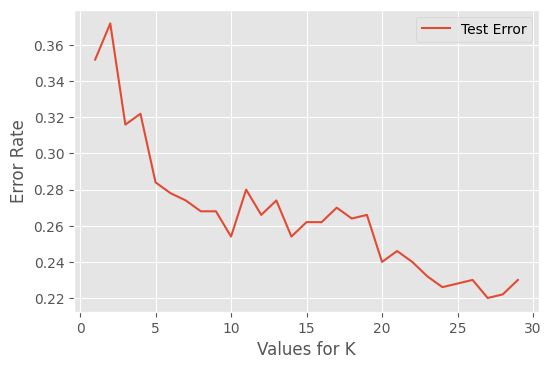

In [47]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("Values for K")

In [56]:
kNN = KNeighborsClassifier(n_neighbors=14)
kNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [57]:
#%%timeit

NN_pred = kNN.predict(x_test)
kNN_acc = accuracy_score(kNN_pred, y_test)
print("Test accuracy: {:.2f}%".format(kNN_acc*100))

Test accuracy: 77.00%


Declaring and initializing the pred_matrix

In [66]:
cols, rows = 5, 500
pred_matrix = [[0 for x in range(rows)] for y in range(cols)]

In [67]:
print(pred_matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Updating the pred_matrix with the values in our prediction arrays/vectors.

In [69]:
for i in range(0, rows):
  pred_matrix[0][i] = dl_pred[i]
  pred_matrix[1][i] = logreg_pred[i]
  pred_matrix[2][i] = mnb_pred[i]
  pred_matrix[3][i] = svc_pred[i]
  pred_matrix[4][i] = kNN_pred[i]

Verifying if the pred_matrix was updated correctly

In [70]:
print(dl_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [71]:
print(logreg_pred)

[1 1 1 1 2 2 1 2 2 1 1 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 2 1 1 1 2 1 2 2 2 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2
 2 2 2 1 2 2 1 2 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 1 1 1
 2 2 2 2 1 2 1 1 2 1 2 1 1 1 1 1 2 1 1 2 2 2 2 1 2 2 2 1 2 1 2 1 1 1 2 1 1
 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2
 2 1 1 2 1 2 2 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 1 1
 1 2 1 2 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 2 2 1 2 1 2 1 2 1 2
 2 2 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 1 1 2 1 1 2 1 2 1 2 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 2 1 1 1
 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1
 2 2 1 1 1 2 1 2 2 2 1 1 

In [72]:
print(mnb_pred)

[1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 2 2 2 2 1 2 2 2 1 1 2 2 1 1 1 2 1 2 2 2 1 1
 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 2 1 2 1 1 2 2 1 1 1 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 2
 2 1 1 1 2 1 1 2 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 1
 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 2 2 1 1 2 2 1 2 1 1 1 1
 2 2 2 2 2 2 1 1 2 1 2 1 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 1 1
 2 1 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 1 2 2
 2 1 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 2 2 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 1 1
 1 2 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 1 1 2 1 2 1 2 1 2 2 2 2 2 1 2 2 2 1 2
 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1 2 1 2
 2 2 2 2 2 2 1 1 2 1 2 1 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1
 1 2 1 1 1 1 2 1 2 2 2 2 2 1 1 1 2 1 2 2 2 1 2 1 2 2 2 1 2 1 1 1 1 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 1 2 

In [73]:
print(svc_pred)

[1 1 2 1 2 2 1 2 2 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 2 1 1 1 2 1 2 2 2 1 1
 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 2 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 2 1 1 1 2 1 2 1 2 2 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 1
 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 1 2 1 1 1 2 1 2 1 1 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 1 1
 2 1 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 2 2 2 2 2 2 1 1 2
 2 1 1 2 1 2 2 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 2 2 1 2 2 1 2 1 1 2 1 1
 1 2 1 2 2 1 1 2 1 1 1 2 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 2 2 1 2 1 2 1 2 1 2
 2 2 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 1 1 1 2 1 1 2 1 1 1 2 1 1
 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2 2 1 1 1
 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 2 2 2 1 2 1 2 1 2 2 2 1 2 1 1 2 1 2 2 2 1
 2 2 1 1 1 2 1 2 2 2 1 2 

In [74]:
print(kNN_pred)

[2 2 2 1 2 2 1 2 2 1 1 1 1 2 1 2 2 2 1 1 2 1 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1
 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 2 1 1 2 2 1 2 1 2
 1 1 2 1 2 2 2 1 1 1 2 2 2 1 2 2 1 2 1 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 2
 2 1 1 1 2 2 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2
 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1 1 1 2 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 1 2 1 1
 2 1 2 2 1 2 1 1 2 1 2 1 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 1 1 2 1 2
 1 2 2 2 1 2 2 2 2 2 1 2 1 1 1 2 1 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2
 2 1 1 2 1 2 2 1 1 2 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 2 2 2 1 1 1 1 2 1 2
 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 2 1 2 1 2 2 2 1 2 2 2 1 1 2 2 1 2 1 2 2 1 1
 2 2 1 2 2 2 2 2 1 2 1 1 1 1 2 2 2 2 1 1 2 1 2 1 2 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 1 1 2 1 1 2 1 2 1 2 1 2
 2 2 2 2 2 2 1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 1 2 2 2 2 1 2 1 1 2 2 2 1 1 2 2
 1 1 1 1 1 1 2 2 2 1 2 2 2 1 1 1 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2 1 2 2
 2 2 2 2 1 2 1 2 2 2 1 2 

In [76]:
for i in range(0, rows):
  for j in range(0, cols):
    print(pred_matrix[j][i], end = ' ')
  print(" ")
  print("\t")

1 1 1 1 2  
	
1 1 1 1 2  
	
1 1 2 2 2  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 1 2  
	
1 2 2 2 2  
	
1 2 2 2 1  
	
1 1 1 1 1  
	
1 1 2 1 2  
	
1 2 2 2 1  
	
1 2 2 2 2  
	
1 1 1 1 2  
	
1 1 1 1 2  
	
1 1 2 1 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 1 1 1 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 1 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 1 1 1 2  
	
1 1 2 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 2 2 2 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 1 2 1 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 2 2 2 1  
	
1 2 2 2 2  
	
1 1 2 2 2  
	
1 1 1 1 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 1 2 1 1  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 1 1 1 1  
	
1 1 1 1 1  
	
1 2 2 2 2  
	
1 2 2 2 2  
	
1 2 2 2 1  
	
1 1 1 

Declaring and initializing the final_pred array

In [77]:
final_pred = []
final_pred = [0 for i in range(500)] 

In [102]:
print(final_pred)

[1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 

Calculating the max votes with the help of the variable count and updating the final_pred array respectively

In [103]:
for i in range(0, rows):
  count = 0
  for j in range(0, cols):
    if(pred_matrix[j][i] == 1):
      count += 1

  if(count >= 3):
    final_pred[i] = 1
  else:
    final_pred[i] = 2

In [104]:
print(final_pred)

[1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 

Calculating the final accuracy of our ensemble 

In [105]:
final_acc = accuracy_score(y_test, final_pred)
final_acc

0.836

# Recommendation System

In [83]:
import random

We create new fake binary dataset of sentiment reviews for 4 new movies.
<br> Therefore, total we have a dataFrame with 49578 rows(users) and 5 columns(Movies)

In [84]:
moviesSentiments = []

for i in range(0,4):
  singleMovieSentiment = [] 
  for j in range(0,49578):
    x = random.randint(1,2)
    singleMovieSentiment.append(x)
  moviesSentiments.append(singleMovieSentiment)  


In [85]:
len(moviesSentiments[0])

49578

In [86]:
rdf = pd.DataFrame(df['sentiment'])
rdf['Movie-2'] = moviesSentiments[0]
rdf['Movie-3'] = moviesSentiments[1]
rdf['Movie-4'] = moviesSentiments[2]
rdf['Movie-5'] = moviesSentiments[3]

We take only the initial 10k rows for our recommendation engine training

In [87]:
rdf = rdf.iloc[:10000]

In [88]:
rdf.shape

(10000, 5)

In [89]:
rdf

,sentiment,Movie-2,Movie-3,Movie-4,Movie-5
0,1,2,1,1,2
1,1,1,1,1,1
2,1,2,1,1,1
3,2,2,2,1,1
4,1,1,1,2,2
...,...,...,...,...,...
10012,1,2,2,2,2
10013,1,2,2,2,1
10014,2,1,2,1,1
10015,1,2,1,2,1


We replace the negative reviews with 1 and positive reviews with 0 

In [90]:
rdf.replace(1, 0, inplace=True)
rdf.replace(2, 1, inplace=True)

In [91]:
rdf

,sentiment,Movie-2,Movie-3,Movie-4,Movie-5
0,0,1,0,0,1
1,0,0,0,0,0
2,0,1,0,0,0
3,1,1,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
10012,0,1,1,1,1
10013,0,1,1,1,0
10014,1,0,1,0,0
10015,0,1,0,1,0


In [92]:
import scipy.spatial

We calculate the euclidean pairwise distance to find the similiar users in our dataset

In [93]:
euclideanDist = scipy.spatial.distance.cdist(rdf, rdf, 
                                         metric='euclidean')
userDist = pd.DataFrame(euclideanDist,    
                             columns=rdf.index.values,
                             index=rdf.index.values)

Here, we create the user ranking dictionary which stores the users in the descending order of their similiarity with each user.
<br> Key: User
<br> Value: List of users ordered according to the similiarity

In [94]:
userRanks = {}

for user in userDist.columns:
    distance = userDist[user].nsmallest(len(userDist))
    data = {user : [i for i in distance.index if i!=user]}
    userRanks.update(data)

The user most similiar to User[2] is User[2310]

In [99]:
print("Dictionary Value for 2nd user : " + str(userRanks[2]))

Dictionary Value for 2nd user : [1281, 807, 9601, 2736, 1630, 992, 7498, 9609, 3559, 7496, 6997, 4075, 2732, 7803, 7807, 8457, 6527, 2248, 4301, 9167, 6989, 986, 5652, 5416, 1959, 2186, 963, 8732, 7748, 310, 4109, 1609, 306, 547, 5183, 4106, 1443, 4520, 6574, 8751, 6570, 5417, 5650, 2221, 5043, 254, 3024, 7465, 7843, 7845, 7045, 2704, 4972, 213, 8788, 3320, 6430, 1560, 7056, 8390, 6419, 9716, 5733, 201, 5228, 9127, 7866, 7869, 9707, 2183, 6470, 3325, 248, 5687, 3140, 9154, 4046, 9654, 1016, 6495, 4669, 4992, 7831, 7027, 557, 9150, 790, 789, 5712, 7453, 8783, 5717, 2717, 8524, 2180, 826, 2069, 8653, 5538, 1566, 9305, 5484, 9381, 7596, 4579, 1544, 4196, 5481, 6890, 1525, 9397, 3081, 5473, 6727, 4183, 4180, 4581, 3085, 9311, 2817, 867, 9327, 8676, 1554, 9336, 6818, 4568, 7612, 5129, 1546, 2826, 2054, 6850, 6854, 2820, 4561, 9355, 9360, 2819, 4573, 5520, 1047, 852, 5467, 2137, 6659, 494, 5167, 1481, 1479, 9243, 5446, 6637, 1977, 3663, 948, 502, 950, 1601, 1468, 4266, 1962, 5621, 509, 831, 

We can see that the values for the User[2] and User[1281] for the movie sentiments are same.

In [96]:
rdf.iloc[2]

sentiment    0
Movie-2      1
Movie-3      0
Movie-4      0
Movie-5      0
Name: 2, dtype: int64

In [98]:
rdf.iloc[1281]

sentiment    0
Movie-2      1
Movie-3      0
Movie-4      0
Movie-5      0
Name: 1281, dtype: int64